# Exploratory Data Analysis: Multiple Variables

### Intro and objectives:

#### review methods to explore the distribution of multiple variables

### In this lab you will learn:
1.  How to explore the distribution of multiple variables


## 0. Let's import required libraries and load some data


In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

In [67]:
happinessReport = pd.read_csv('https://raw.githubusercontent.com/thousandoaks/Maths4DS101/main/data/world-happiness-report.csv',parse_dates=['year'])

In [68]:
happinessReport.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008-01-01,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009-01-01,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010-01-01,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011-01-01,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012-01-01,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [69]:
happinessReport.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [70]:
# Let's select 4 countries

countryFilter=['Mexico','Sweden','China','Afghanistan','Spain']

In [71]:
happinessReportFiltered=happinessReport[happinessReport['Country name'].isin(countryFilter)]

### 1. Correlation matrix

#### Pandas provides a convenient method to compute the correlation matrix


In [72]:
happinessReportFiltered.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [73]:
happinessReportFiltered[['Life Ladder','Log GDP per capita','Healthy life expectancy at birth']].corr()

,Life Ladder,Log GDP per capita,Healthy life expectancy at birth
Life Ladder,1.000000,0.913259,0.801538
Log GDP per capita,0.913259,1.000000,0.946612
Healthy life expectancy at birth,0.801538,0.946612,1.000000


### 2. Heatmaps

#### Seaborn provides a convenient method to compute the correlation matrix


In [74]:
correlationMatrix=happinessReportFiltered[['Freedom to make life choices','Life Ladder','Log GDP per capita','Healthy life expectancy at birth','Perceptions of corruption','Positive affect']].corr()

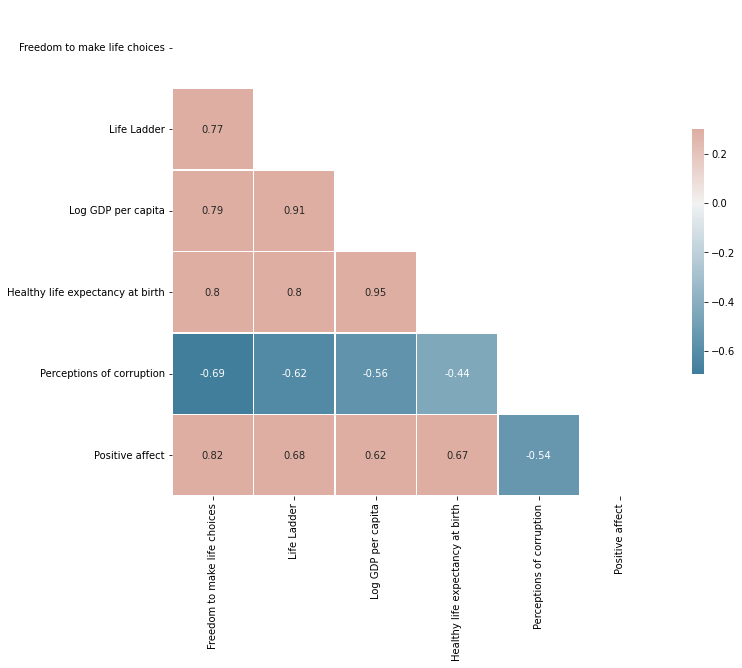

In [75]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlationMatrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlationMatrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

### 3. ScatterPlots
#### ScattePlots are incredibly useful!

#### There are several alternatives to compute histograms in Python:

#### 1. Using Pandas
#### 2. Using seaborn

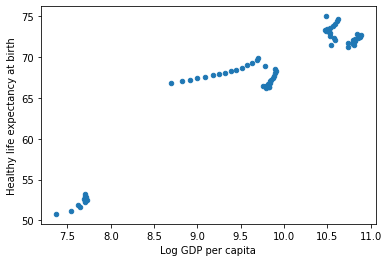

In [76]:
happinessReportFiltered.plot(x='Log GDP per capita',    y='Healthy life expectancy at birth',    kind='scatter')

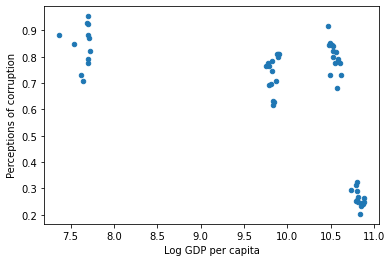

In [77]:
happinessReportFiltered.plot(x='Log GDP per capita',    y='Perceptions of corruption',    kind='scatter')

### 4. Box Plots
#### Box Plots are quite useful to summarize visually the distribution of a variable


#### We recommend using seaborn

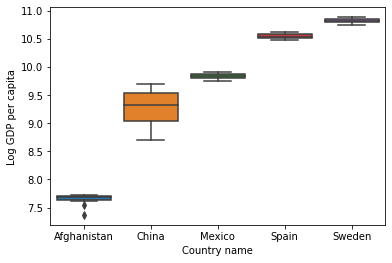

In [78]:

sns.boxplot(data=happinessReportFiltered, x="Country name", y="Log GDP per capita")

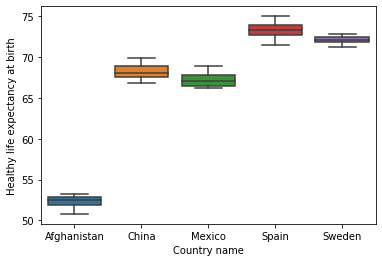

In [79]:


sns.boxplot(data=happinessReportFiltered, x="Country name", y="Healthy life expectancy at birth")

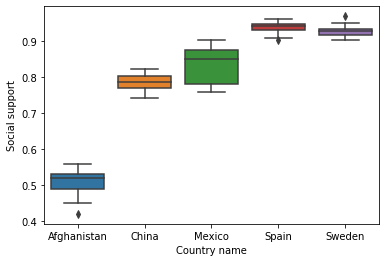

In [80]:
sns.boxplot(data=happinessReportFiltered, x="Country name", y="Social support")

### 4. Violin Plots
#### Violin Plots are also quite useful to summarize visually the distribution of a variable. They are more informative that boxplots.


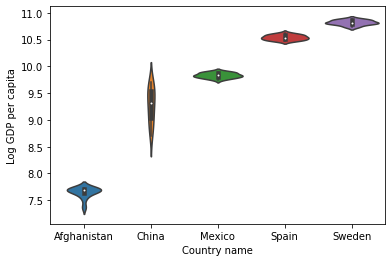

In [81]:
sns.violinplot(data=happinessReportFiltered, x="Country name", y="Log GDP per capita")

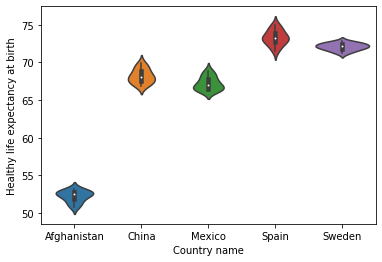

In [82]:


sns.violinplot(data=happinessReportFiltered, x="Country name", y="Healthy life expectancy at birth")

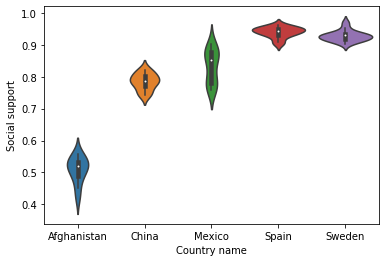

In [83]:
sns.violinplot(data=happinessReportFiltered, x="Country name", y="Social support")